# Lesson 3: Demos


## Part 1: Normality Demo

In [2]:
#General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
mtcars = pd.read_csv("/Users/jg/Documents/GitHub/DAT-DEN-03/lessons/lesson-03/dataset/mtcars.csv")
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Although the mean and median both give us some sense of the center of a distribution, they aren't always the same. The *median* gives us a value that **splits the data into two halves** while the *mean* is a **numeric average,** so extreme values can have a significant impact on the mean. 

In a symmetric distribution, the mean and median will be the same. Let's investigate with a density plot:

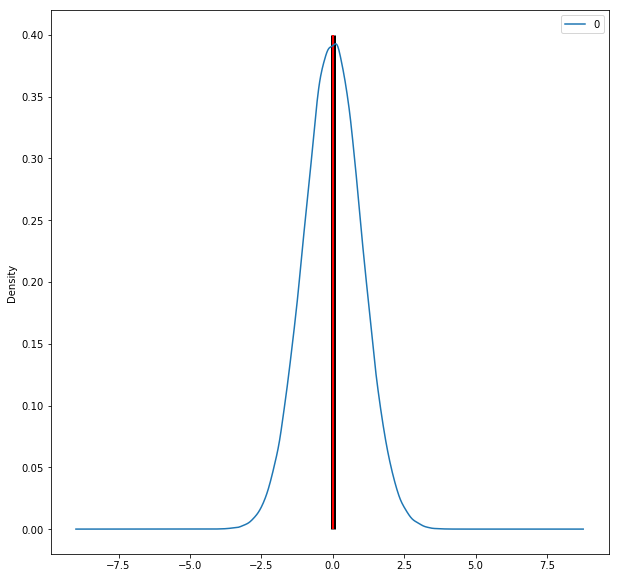

In [4]:
norm_data = pd.DataFrame(np.random.normal(size=100000))

norm_data.plot(kind="density",
              figsize=(10,10))


plt.vlines(norm_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.4,
           linewidth=5.0)

plt.vlines(norm_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="red")

In the plot above, the mean and median are both so close to zero that the red median line lies on top of the thicker black line drawn at the mean. 

In skewed distributions, the mean tends to get pulled in the direction of the skew, while the median tends to resist the effects of skew:
 

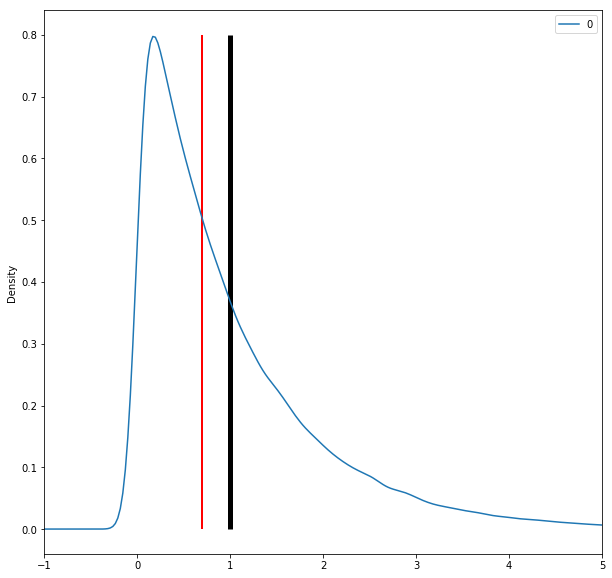

In [5]:
skewed_data = pd.DataFrame(np.random.exponential(size=100000))

skewed_data.plot(kind="density",
              figsize=(10,10),
              xlim=(-1,5))


plt.vlines(skewed_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.8,
           linewidth=5.0)

plt.vlines(skewed_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.8, 
           linewidth=2.0,
           color="red")

Notice that the mean is also influenced heavily by outliers, while the median resists the influence of outliers:


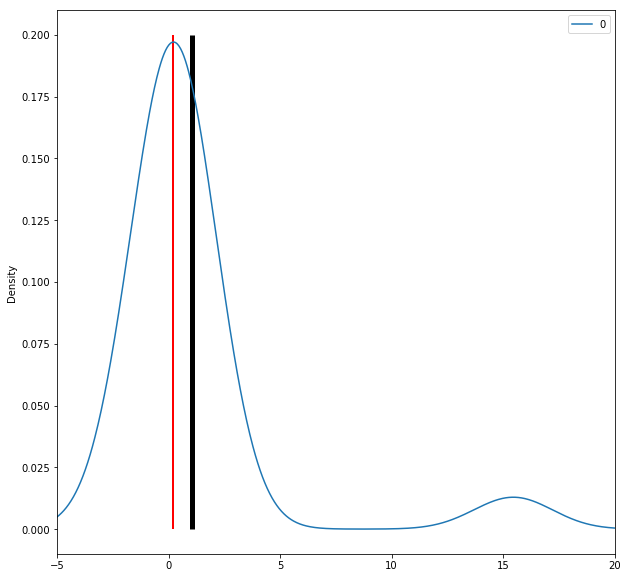

In [6]:
norm_data = np.random.normal(size=50)
outliers = np.random.normal(15, size=3)
combined_data = pd.DataFrame(np.concatenate((norm_data, outliers), axis=0))

combined_data.plot(kind="density",
              figsize=(10,10),
              xlim=(-5,20))


plt.vlines(combined_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=5.0)

plt.vlines(combined_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=2.0,
           color="red")

Since the median tends to resist the effects of skewness and outliers, it is known a "robust" statistic. 

The median generally gives a better sense of the typical value in a distribution with significant skew or outliers.

In [10]:
comp1 = np.random.normal(0, 1, size=200) # N(0, 1)
comp2 = np.random.normal(10, 2, size=200) # N(10, 4)

df1 = pd.Series(comp1)
df2 = pd.Series(comp2)

### Skewness and Kurtosis
*Skewness* measures the **skew or asymmetry of a distribution** while *Kurtosis* measures the **"peakedness" of a distribution**. 

We won't go into the exact calculations behind these, but they are essentially just statistics that take the idea of variance a step further: while variance involves squaring deviations from the mean, skewness involves cubing deviations from the mean, and kurtosis involves raising deviations from the mean to the 4th power.

Pandas has built in functions for checking skewness and kurtosis, df.skew() and df.kurt() respectively:

In [11]:
mtcars["mpg"].skew()  # Check skewness

0.67237713762908047

In [12]:
mtcars["mpg"].kurt()  # Check kurtosis 

-0.0220062914240855

To explore these two measures further, let's create some dummy data and inspect it:

In [13]:
norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)
uniform_data = np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})

## Types of distributions

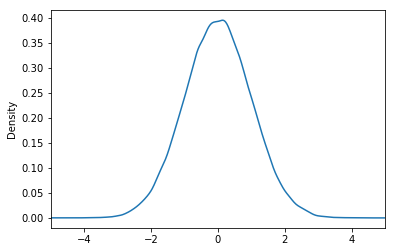

In [14]:
data_df["norm"].plot(kind="density", xlim=(-5,5))

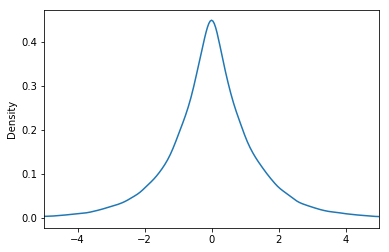

In [15]:
data_df["peaked"].plot(kind="density", xlim=(-5,5))

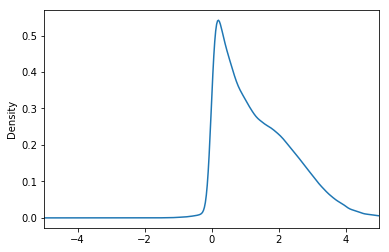

In [16]:
data_df["skewed"].plot(kind="density", xlim=(-5,5))

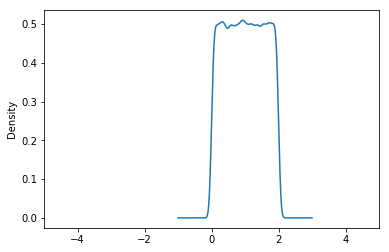

In [17]:
data_df["uniform"].plot(kind="density", xlim=(-5,5))

### All together

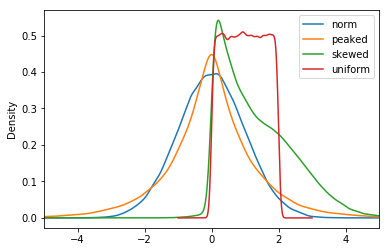

In [18]:
data_df.plot(kind="density",
            xlim=(-5,5))

### Skewness

Now let's check the skewness of each of these distributions. 

Since skewness measures asymmetry, we'd expect to see low skewness for all of the distributions except the skewed one, because all the others are roughly symmetric:

In [19]:
data_df.skew()

norm       0.012017
peaked    -0.050952
skewed     1.000091
uniform   -0.001361
dtype: float64

### Kurtosis

Now let's check kurtosis. Since kurtosis measures peakedness, we'd expect the flat (uniform) distribution to have low kurtosis while the distributions with sharper peaks should have higher kurtosis.

In [20]:
data_df.kurt()

norm       0.012165
peaked     2.858307
skewed     1.302059
uniform   -1.199661
dtype: float64

As we can see from the output, the normally distributed data has a kurtosis near zero, the flat distribution has negative kurtosis, and the two pointier distributions have positive kurtosis.

## Part 2: Class Variable Demo

### Class/Dummy Variables
We want to represent categorical variables numerically, but we can't simply code them as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban (suggesting that urban is somehow "twice" the suburban category, which doesn't make sense).

Why do we only need **two dummy variables, not three?** Because two dummies capture all of the information about the Area feature, and implicitly defines rural as the reference level.

In general, if you have a categorical feature with k levels, you create k-1 dummy variables.


#### Create three dummy variables using get_dummies, then exclude the first dummy column
my_categorical_var_dummies = pd.get_dummies(my_categorical_var, prefix='Area').iloc[:, 1:]

In [21]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Handling Categorical Predictors with Two Categories

Up to now, all of our predictors have been numeric. What if one of our predictors was categorical?


For scikit-learn, we need to represent all data numerically. 

If the feature only has two categories, we can simply create a dummy variable that represents the categories as a binary value.

### Handling Categorical Predictors

Let's create a new feature called Area, and randomly assign observations to be rural, suburban, or urban:

In [22]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,radio,newspaper,sales,Area
1,230.1,37.8,69.2,22.1,rural
2,44.5,39.3,45.1,10.4,urban
3,17.2,45.9,69.3,9.3,rural
4,151.5,41.3,58.5,18.5,urban
5,180.8,10.8,58.4,12.9,suburban


We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an ordered relationship between suburban and urban (and thus urban is somehow "twice" the suburban category).

Instead, we create another dummy variable:

In [23]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,rural,0,0
2,44.5,39.3,45.1,10.4,urban,0,1
3,17.2,45.9,69.3,9.3,rural,0,0
4,151.5,41.3,58.5,18.5,urban,0,1
5,180.8,10.8,58.4,12.9,suburban,1,0


In [24]:
data.drop(["Area"], axis=1)

,TV,radio,newspaper,sales,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,0,0
2,44.5,39.3,45.1,10.4,0,1
3,17.2,45.9,69.3,9.3,0,0
4,151.5,41.3,58.5,18.5,0,1
5,180.8,10.8,58.4,12.9,1,0
6,8.7,48.9,75.0,7.2,1,0
7,57.5,32.8,23.5,11.8,1,0
8,120.2,19.6,11.6,13.2,0,1
9,8.6,2.1,1.0,4.8,0,0
10,199.8,2.6,21.2,10.6,1,0
